# <font face = Tahoma color=Blue size=6>Bike Sharing for Boom Bikes Organization

### <font color=green>Background about case study

Programming assignment on Multiple Linear Regression Model concept

BOOM BIKES is a US based sharing provider, who is facing difficulty to sustain in the current market scenario of Corona Pandemic and dip in their revenue. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

### <font color=green>Business Goal:
Goal is to model the demand for shared bikes with the available independent variables. 
It will be used by the BOOM BIKES management to understand how exactly the demands vary with different features. 
They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 
Further, the model will be a good way for management to understand the demand dynamics of a new market. 


<font color = blue> BOOM BIKES have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to <b><u>understand the factors affecting the demand for these shared bikes in the American market</b></u></font>.
    
The company wants to know:
<p>
<Li>Which variables are significant in predicting the demand for shared bikes.
<li>How well those variables describe the bike demands

### <font color=blue>Import all the required python libraries for data handling, and Machine Learning algorithms for Linear Regression.

In [200]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Import Scikit Learn library to be able to perform predictive data anlysis and Linear Regression.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Import statsmodel api for estimating various statistical models, conducting statistical tests, and exploring data, especially VIF.
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



### <font color=blue> Import source data from day.csv and observe the data along with its few characteristics

In [201]:
#Load the day dataset from its csv file
day=pd.read_csv(r"E:\Ramesh\UpGradCaseStudies\Bike Sharing - BoomBikes\day.csv")

print("Shapre of the inbound data:", day.shape)

day.head()


Shapre of the inbound data: (730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [202]:
# Describe the dataset to view its few aggregates & stats like count, mean, SD, min, max and 25/50/07 quartile values 
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [203]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<font color = blue> As we observed, this source dataset has 16 columns - except one date column (object), rest all other columns are either float or int data type..


### <font color = blue>Check the source data quality and cleans the data as needed (ensure no null cols or rows, remove unwanted columns from the dataset, drop duplicates - if any)

In [204]:
# Any NULL/MISSING values by each column & row in dataset?

#Column wise null checks
round(100*(day.isnull().sum()/len(day)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [205]:
#Row wise null checks
round((day.isnull().sum(axis=1)/len(day))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

##### No Null values either in row or column wise data

#### Drop duplicates

In [206]:
print("Shape BEFORE drop duplicates: ", day.shape)
# Checking for duplicates and dropping the entire duplicate row if any
day.drop_duplicates(subset=None, inplace=True)
print("Shape AFTER drop duplicates: ", day.shape)

Shape BEFORE drop duplicates:  (730, 16)
Shape AFTER drop duplicates:  (730, 16)


##### No duplicate rows as same share "before" and "after" dropping duplicates

#### <font color=blue> Drop any redundant and/or unwanted columns

As per the given data dict, <b><font color=blue>"casual" and "registered" columns can be dropped as these two columns are having "count" of bikes booked by these two customer categories. Our target variable is "cnt" - indicating "total count of bikes"</font> </b>with no categorization.

Also, remove index column instant, redundant value column dteday, as we have isolated columns holding individual date values  

In [207]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [208]:
day_source = day # This is to keep source dataset in a separate dataframe for any reference.

In [209]:
day = day[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [210]:
#Observe change in day's shape

day.info()
day.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


(730, 12)

####  As per the given Data Dictionary, season has four levels (1:spring, 2:summer, 3:fall, 4:winter) , so should be encoded with the help three dummy variables

In [211]:
# Leverage pd.get_dummies(), which converts categorical data into dummy or indicator variables.

seasons = pd.get_dummies(day['season'])

seasons.info()

seasons.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       730 non-null    uint8
 1   2       730 non-null    uint8
 2   3       730 non-null    uint8
 3   4       730 non-null    uint8
dtypes: uint8(4)
memory usage: 8.6 KB


,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [212]:
# Rename the seasons column names
seasons_with_label = seasons.rename(columns={1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace = False)

#Generate sample x rows (randomly)
seasons_with_label.sample(5) # 5 rows

,spring,summer,fall,winter
473,0,1,0,0
593,0,0,1,0
492,0,1,0,0
139,0,1,0,0
103,0,1,0,0


#### Add seasons_with_label to day dataset

In [213]:
day = pd.concat((day,seasons_with_label),axis=1)

In [214]:
day.info()
day.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  spring      730 non-null    uint8  
 13  summer      730 non-null    uint8  
 14  fall        730 non-null    uint8  
 15  winter      730 non-null    uint8  
dtypes: float64(4), int64(8), uint8(4)
memory usage: 77.0 KB


(730, 16)

##### We can drop one type of "season" column, as we can explain that by referring to the rest of the three "season" columns

If we drop one specific column, and the value of the rest of the three are 000, it refers to the one we have dropped.

In [215]:
# Dropping spring from day dataset

day = day.drop(['season','spring'],axis=1)
day.sample(5)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
169,0,6,0,0,0,2,28.665847,32.29230,66.6667,6.834000,4744,1,0,0
675,1,11,0,3,1,2,12.129153,13.73105,54.7500,20.375236,5035,0,0,1
44,0,2,0,1,1,1,17.015000,19.91750,37.5833,27.999836,1913,0,0,0
474,1,4,0,5,1,1,21.593347,25.78875,69.4583,10.041357,7290,1,0,0
508,1,5,0,4,1,1,26.855000,30.33500,71.6667,11.584032,6770,1,0,0


In [216]:
# Similar to "season", similar activity is required on "mnth" as well.

mnths = pd.get_dummies(day['mnth'])
mnths.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [217]:
# Map the number to abbreviated value of each month 1 to 12 to Jan to Dec respectively.

mnths_with_label = mnths.rename( columns= {1:'Jan', 2:'Feb', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace = False)
mnths_with_label.sample(5)

,Jan,Feb,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
683,0,0,0,0,0,0,0,0,0,0,1,0
264,0,0,0,0,0,0,0,0,1,0,0,0
430,0,0,1,0,0,0,0,0,0,0,0,0
378,1,0,0,0,0,0,0,0,0,0,0,0
37,0,1,0,0,0,0,0,0,0,0,0,0


#### Add mnths_with_label to day dataset

In [218]:
day = pd.concat((day,mnths_with_label),axis=1)
day.sample(5)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
326,0,11,0,3,1,2,18.074153,21.52685,75.7917,22.500275,...,0,0,0,0,0,0,0,0,1,0
383,1,1,0,4,1,1,7.790000,9.50190,49.7500,14.750586,...,0,0,0,0,0,0,0,0,0,0
134,0,5,0,0,0,2,23.062500,26.80000,86.7083,10.249593,...,0,0,1,0,0,0,0,0,0,0
211,0,7,0,0,0,1,33.039153,36.48980,48.0833,11.042471,...,0,0,0,0,1,0,0,0,0,0
503,1,5,0,6,0,1,24.600000,28.34540,45.6250,5.626325,...,0,0,1,0,0,0,0,0,0,0


In [219]:
day.info()
day.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   mnth        730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
 11  summer      730 non-null    uint8  
 12  fall        730 non-null    uint8  
 13  winter      730 non-null    uint8  
 14  Jan         730 non-null    uint8  
 15  Feb         730 non-null    uint8  
 16  March       730 non-null    uint8  
 17  April       730 non-null    uint8  
 18  May         730 non-null    uint8  
 19  June        730 non-null    u

(730, 26)

#### As mentioned in above for "seasons", we can drop one of the month and can explain by referring to remaining 11 months. Drop any one from Jan to Dec. Let's drop Jan.

"mnth" already referred through abbreviated months, so "mnth" can also be dropped.


In [220]:
day = day.drop(['mnth','Jan'],axis=1) # Dropping Jan month column and mnth column from day dataset

In [221]:
day.info()
day.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   weekday     730 non-null    int64  
 3   workingday  730 non-null    int64  
 4   weathersit  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
 10  summer      730 non-null    uint8  
 11  fall        730 non-null    uint8  
 12  winter      730 non-null    uint8  
 13  Feb         730 non-null    uint8  
 14  March       730 non-null    uint8  
 15  April       730 non-null    uint8  
 16  May         730 non-null    uint8  
 17  June        730 non-null    uint8  
 18  July        730 non-null    uint8  
 19  Aug         730 non-null    u

(730, 24)

#### Similarly, encode weekday as follows:
{1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday',5:'Friday',6:'Saturday',0:'Sunday'}

And, add the resultant to "Day" dataset.
Then, drop one of the expanded week column along with "weekday" column from "day" dataset (as already expanded)

In [222]:
weekdays = pd.get_dummies(day['weekday'])
weekdays.sample(5)

,0,1,2,3,4,5,6
69,0,0,0,0,0,1,0
108,0,0,1,0,0,0,0
36,1,0,0,0,0,0,0
266,0,0,0,0,0,0,1
332,0,0,1,0,0,0,0


In [223]:
# Encoding
weekdays_with_label = weekdays.rename(columns={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thrusday', 5:'Friday', 6:'Saturday', 0:'Sunday'}, inplace = False)
weekdays_with_label.sample(7)

,Sunday,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
356,0,0,0,0,0,1,0
546,1,0,0,0,0,0,0
637,1,0,0,0,0,0,0
187,0,0,0,0,1,0,0
574,1,0,0,0,0,0,0
393,1,0,0,0,0,0,0
266,0,0,0,0,0,0,1


In [224]:
#Concatenate weekdays_with_label to "day" dataset

day = pd.concat((day, weekdays_with_label),axis=1)
day.sample(5)

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,Oct,Nov,Dec,Sunday,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
682,1,0,3,1,1,11.855847,14.07815,55.2083,13.374875,5495,...,0,1,0,0,0,0,1,0,0,0
502,1,0,5,1,1,23.130847,27.55605,52.3333,9.166739,7639,...,0,0,0,0,0,0,0,0,1,0
446,1,0,5,1,2,24.668347,28.50335,69.4167,7.792100,8362,...,0,0,0,0,0,0,0,0,1,0
172,0,0,3,1,1,30.066653,34.69145,70.7500,11.541554,4507,...,0,0,0,0,0,0,1,0,0,0
323,0,0,0,0,2,18.996653,22.85290,68.4583,12.458650,3520,...,0,1,0,1,0,0,0,0,0,0


In [225]:
# Dropping 'weekday' and 'Sunday' from "day" dataset as not required.

day = day.drop(['weekday','Sunday'],axis=1)
day.sample(5)

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,...,Sep,Oct,Nov,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
138,0,0,1,2,21.764153,25.53710,82.9583,7.250271,4575,1,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,2,10.591653,12.46855,56.0833,16.292189,2739,0,...,0,0,0,1,0,0,0,0,0,1
486,1,0,1,1,23.130847,26.89480,79.7083,9.249886,6169,1,...,0,0,0,0,0,0,1,0,0,0
224,0,0,0,2,28.119153,32.29290,72.9583,14.167418,4150,0,...,0,0,0,0,0,0,0,0,0,1
322,0,0,0,1,13.495847,16.22415,50.2083,15.041232,3663,0,...,0,0,1,0,0,0,0,0,0,1


In [226]:
day.info()
day.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   weathersit  730 non-null    int64  
 4   temp        730 non-null    float64
 5   atemp       730 non-null    float64
 6   hum         730 non-null    float64
 7   windspeed   730 non-null    float64
 8   cnt         730 non-null    int64  
 9   summer      730 non-null    uint8  
 10  fall        730 non-null    uint8  
 11  winter      730 non-null    uint8  
 12  Feb         730 non-null    uint8  
 13  March       730 non-null    uint8  
 14  April       730 non-null    uint8  
 15  May         730 non-null    uint8  
 16  June        730 non-null    uint8  
 17  July        730 non-null    uint8  
 18  Aug         730 non-null    uint8  
 19  Sep         730 non-null    u

(730, 29)

#### As mentioned in Data Dictionary, handle the encoding for weathersit feature.

<pre>
weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
        
</pre>
Follow the same process as above performed for weekday (i.e, encode, append, drop in sequence). 


In [227]:
weathersits = pd.get_dummies(day['weathersit'])
weathersits.sample(5)

,1,2,3
638,0,1,0
711,1,0,0
101,0,1,0
62,0,1,0
279,1,0,0


In [228]:
# Encoding for above 1, 2, and 3 as Clear, Mist and List respectively.

weathersits_with_label = weathersits.rename(columns = {1:'Clear', 2: 'Mist', 3: 'Light'}, inplace = False)

In [229]:
# Append to day dataset
day = pd.concat((day, weathersits_with_label), axis =1)
day.sample(5)

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,...,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,Light
479,1,0,1,1,19.543347,23.51585,42.7917,7.959064,6196,1,...,0,0,0,1,0,0,0,1,0,0
423,1,0,1,1,14.725847,17.67625,39.5833,12.958939,4363,0,...,0,0,1,0,0,0,0,1,0,0
64,0,0,0,2,15.437402,18.31260,94.8261,23.000229,605,0,...,0,0,0,0,0,0,0,0,1,0
596,1,0,1,2,26.069153,29.79835,73.4167,8.708593,6530,0,...,0,1,0,0,0,0,0,0,1,0
70,0,0,0,1,13.495847,16.28750,59.4583,14.791925,2132,0,...,0,0,0,0,0,0,1,1,0,0


In [230]:
# Drop "weathersit" as we have expanded in day dataset.

day = day.drop('weathersit', axis=1)

In [231]:
day.info()
day.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   summer      730 non-null    uint8  
 9   fall        730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  Feb         730 non-null    uint8  
 12  March       730 non-null    uint8  
 13  April       730 non-null    uint8  
 14  May         730 non-null    uint8  
 15  June        730 non-null    uint8  
 16  July        730 non-null    uint8  
 17  Aug         730 non-null    uint8  
 18  Sep         730 non-null    uint8  
 19  Oct         730 non-null    u

(730, 31)

### <font color =blue>Data Visualizations
    

In [232]:
day.describe().T.style.background_gradient(cmap ='cool', axis=1).set_precision(2)

,count,mean,std,min,25%,50%,75%,max
yr,730.00,0.50,0.50,0.00,0.00,0.50,1.00,1.00
holiday,730.00,0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,730.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
temp,730.00,20.32,7.51,2.42,13.81,20.47,26.88,35.33
atemp,730.00,23.73,8.15,3.95,16.89,24.37,30.45,42.04
hum,730.00,62.77,14.24,0.00,52.00,62.62,72.99,97.25
windspeed,730.00,12.76,5.20,1.50,9.04,12.13,15.63,34.00
cnt,730.00,4508.01,1936.01,22.00,3169.75,4548.50,5966.00,8714.00
summer,730.00,0.25,0.43,0.00,0.00,0.00,1.00,1.00
fall,730.00,0.26,0.44,0.00,0.00,0.00,1.00,1.00


From the above, 
<pre> 
1: Data are not uniform across all the features; hence it needs to be scaled. So that the interpreation can be done sensibly.
2: MinMax Scaling can be used here as it take care of Outliers in the Data

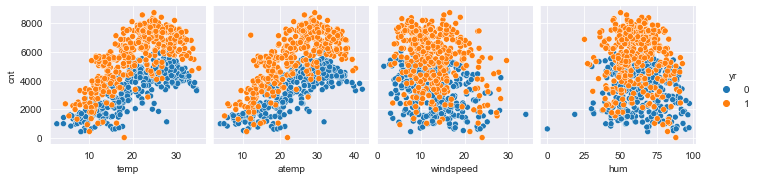

In [233]:
# Visualization of Relationship of Numerical Features against Target Variable cnt

sns.pairplot(day, x_vars=["temp", 'atemp', 'windspeed', "hum"], y_vars=['cnt'], hue ='yr')

plt.show()

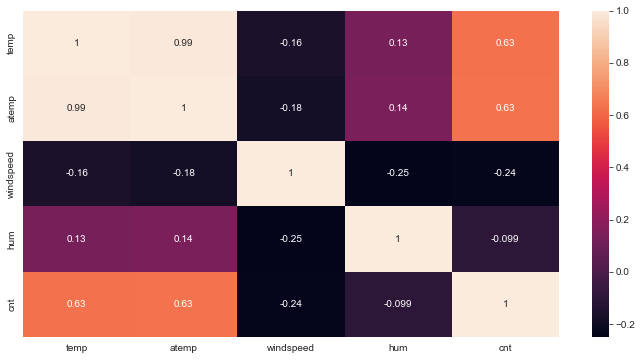

In [234]:
#Generate the heatmap to find correlation

plt.figure(figsize = (12,6))
sns.heatmap(day[['temp', 'atemp', 'windspeed', 'hum', 'cnt']].corr(), annot =True)
plt.show()

Few Observations from the above two plots:

1. Temp and atemp are very strongly correlated one can be dropped
2. Humidity has not much Negative effect on the Target Variable - cnt.

In [235]:
# As per above observations, dropping "atemp" 


day = day.drop(['atemp'],axis =1)

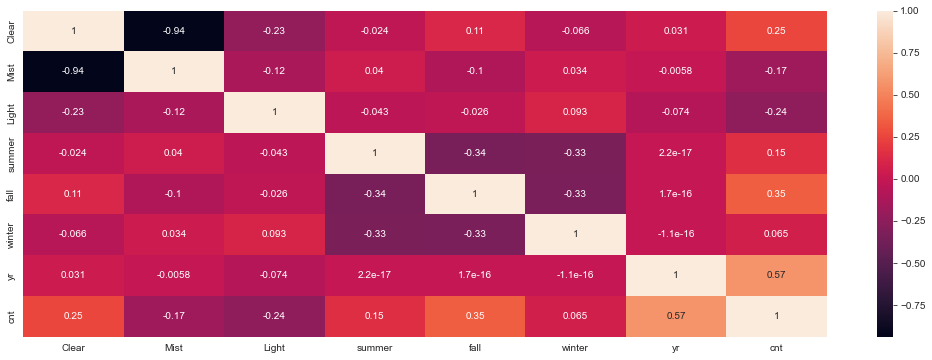

In [236]:
# Generate heatmap to find the correlation between 'Clear', 'Mist','Light','summer','fall','winter','yr' and target variable cnt.

plt.figure(figsize = (18,6))
sns.heatmap(day[['Clear', 'Mist','Light','summer','fall','winter','yr', 'cnt']].corr(), annot =True)
plt.show()

In [237]:
# Aggregate the target variable by "seasons" and "months" to find the bike rental trend across various seasons and months.

day.groupby(['summer','fall','winter','Feb','March','April','May','June', \
             'July' ,'Aug','Sep','Oct','Nov','Dec'])['cnt'].mean().sort_values(ascending = False)

summer  fall  winter  Feb  March  April  May  June  July  Aug  Sep  Oct  Nov  Dec
0       0     1       0    0      0      0    0     0     0    1    0    0    0      6024.500000
1       0     0       0    0      0      0    1     0     0    0    0    0    0      5773.850000
0       1     0       0    0      0      0    1     0     0    0    0    0    0      5769.400000
                                              0     0     0    1    0    0    0      5672.704545
                                                          1    0    0    0    0      5664.419355
                                                    1     0    0    0    0    0      5563.677419
1       0     0       0    0      0      1    0     0     0    0    0    0    0      5349.774194
0       0     1       0    0      0      0    0     0     0    0    1    0    0      5199.225806
1       0     0       0    0      1      0    0     0     0    0    0    0    0      4484.900000
0       0     1       0    0      0      0   

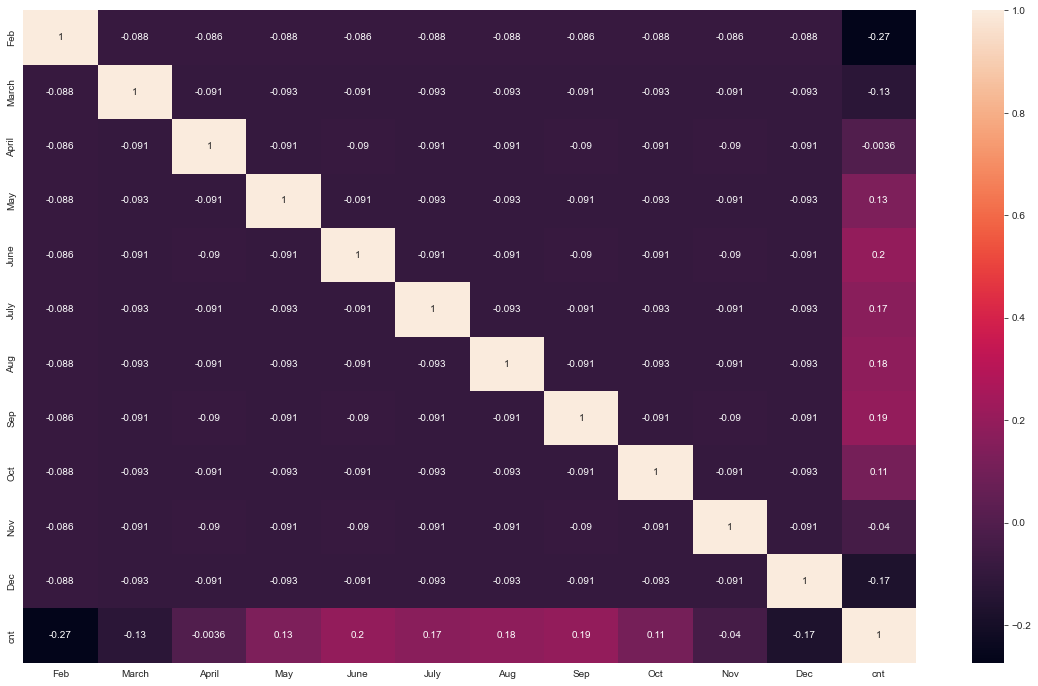

In [238]:
# Generate heatmap to find the correlation between "all months" and target variable cnt.

plt.figure(figsize = (20,12))
sns.heatmap(day[['Feb','March','April','May','June','July' ,'Aug','Sep','Oct','Nov','Dec', 'cnt']].corr(),annot = True)
plt.show()

##### Observation: 

1. Increased demand over Winter Season for bike rentals vs the other seasons, especially in September.

In [239]:
# Observe the trend among the holiday, working day, and "season".

day.groupby(['holiday', 'workingday','summer','fall','winter'])['cnt'].mean().sort_values(ascending = False)

holiday  workingday  summer  fall  winter
0        1           0       1     0         5718.114504
1        0           0       1     0         5707.750000
0        0           0       1     0         5457.075472
                     1       0     0         5160.365385
         1           1       0     0         4926.664062
1        0           1       0     0         4909.250000
0        1           0       0     1         4785.611570
         0           0       0     1         4674.549020
1        0           0       0     1         4025.333333
0        1           0       0     0         2788.495798
         0           0       0     0         2330.888889
1        0           0       0     0         1687.857143
Name: cnt, dtype: float64

#### Observation:

Working day during fall season would have high demand with closest proximate on holidays in the same season too.


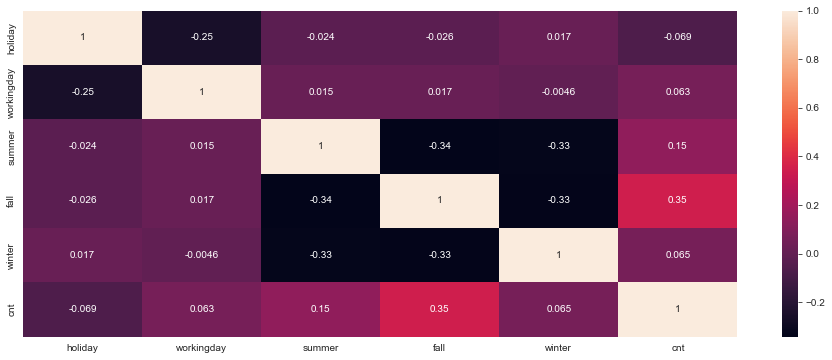

In [240]:
plt.figure(figsize = (16,6))
sns.heatmap(day[['holiday', 'workingday','summer','fall','winter', 'cnt']].corr(),annot = True)
plt.show()

#### Observation

Most of the bikes have been rented during the weekdays... especially during fall.

Low business during holiday.

More Number of Bikes have been rented in the year 2019 than 2018; this means profitable business for Boom Bikes organization.

## <font color=blue>Model Building & Evaluation

Testing the model on the same data as it was trained on mostly will lead to an overfit and poor performance in real-life scenarios.

In order to avoid that, split your data into 2 sets: (1) train set and (2) test set. 

The most common practice is to do either 80-20 split or 70-30 split.

In [241]:
# Splitting the Data into Training and Testing Sets

day_train, day_test = train_test_split(day, train_size = 0.7, random_state = 100)

#print train set shape
print(day_train.shape)

#print tes set shape
print(day_test.shape)

(510, 30)
(220, 30)


Scaling in LR is important as it ensures that features are treated fairly, algorithms work effectively, and models perform optimally. Apply scaling on numerical variables.

In [242]:
# Normalize or scale features within a given range. 
#MinMaxScaler() will ensures that each feature’s values lie between a specified minimum and maximum, typically 0 and 1.

scaler = MinMaxScaler()

In [243]:
# Create a list of Numerical Variables which need to Scaled
num_vars = ['temp', 'windspeed', 'hum', 'cnt']

# For the Training Data Fit and Transform both need to done.
day_train[num_vars] = scaler.fit_transform( day_train[num_vars] )

# View the Statistical Description to ensure MinMax Scaling has done properly
day_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.676471,0.468282,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537440,0.225858,0.0,0.339853,0.542596,0.735215,1.0
hum,510.0,0.650480,0.145846,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320883,0.169803,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,0.513499,0.224421,0.0,0.356420,0.518638,0.684710,1.0
summer,510.0,0.247059,0.431725,0.0,0.000000,0.000000,0.000000,1.0
fall,510.0,0.262745,0.440557,0.0,0.000000,0.000000,1.000000,1.0
winter,510.0,0.247059,0.431725,0.0,0.000000,0.000000,0.000000,1.0


<b> As per the above described "train set", MinMax Scaling has been done properly as min and max values are in the range of 0 and 1 across all features.

#### <font color = blue> Prepare the Training Dataset


In [244]:
# Training Dataset preparation

y_train = day_train.pop('cnt')

X_train = day_train

print(X_train.shape)

y_train.sample(5)

(510, 29)


378    0.284284
340    0.078578
483    0.722734
243    0.585941
76     0.370110
Name: cnt, dtype: float64

#### Feature Selection by using Recursive Feature Elimination - RFE 

Identify the most relevant features in a dataset, eliminate least important feature, and build the model using remaining features... repeat these until required number of features remains

In [245]:
# Running RFE with the Output Number of variables equals to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [246]:
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', False, 2),
 ('winter', True, 1),
 ('Feb', False, 7),
 ('March', False, 3),
 ('April', False, 5),
 ('May', False, 4),
 ('June', False, 6),
 ('July', False, 8),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 9),
 ('Dec', False, 10),
 ('Monday', False, 11),
 ('Tuesday', False, 12),
 ('Wednesday', False, 14),
 ('Thrusday', False, 15),
 ('Friday', False, 13),
 ('Saturday', True, 1),
 ('Clear', True, 1),
 ('Mist', True, 1),
 ('Light', True, 1)]

In [247]:
# List the Recursive Feature Elimination (RFE) Selected Features to KEEP
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'Aug', 'Sep', 'Oct', 'Saturday', 'Clear', 'Mist', 'Light'],
      dtype='object')

In [248]:
# List the Recursive Feature Elimination (RFE) Selected Features to REJECT
X_train.columns[~(rfe.support_)]

Index(['fall', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Nov', 'Dec',
       'Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday'],
      dtype='object')

#### Let's start buildingthe model using <font color=blue><u>statsmodels</u></font> for the detailed statistical analysis

In [249]:
# Creating X train with RFE Selected Variables
X_train_rfe = X_train[col]

In [250]:
# Adding Constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create Object for the Model
lm = sm.OLS(y_train, X_train_rfe).fit()

# View Summary of Statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 08 Apr 2024   Prob (F-statistic):          8.70e-192
Time:                        21:15:31   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0701      0.025      2.765      0.006       0.020       0.120
yr             0.2292      0.008     28.712      0.000       0.214       0.245
holiday       -0.0557      0.027     -2.069      0.039      -0.109      -0.003
workingday     0.0442      0.012      3.829      0.000       0.022       0.067
temp           0.5309      0.022     24.146      0.000       0.488       0.574
hum           -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed     -0.1858      0.025     -7.353      0.000      -0.235      -0.136
summer         0.1049      0.011      9.778      0.000       0.084       0.126
winter         0.1349      0.012     11.306      0.000       0.111       0.158
Aug            0.0557      0.016      3.457      0.001       0.024       0.087
Sep            0.1252      0.016      7.757      0.000       0.093       0.157
Oct            0.0385      0.017      2.230      0.026       0.005       0.072
Saturday       0.0527      0.015      3.627      0.000       0.024       0.081
Clear          0.1246      0.009     14.641      0.000       0.108       0.141
Mist           0.0679      0.011      5.937      0.000       0.045       0.090
Light         -0.1224      0.022     -5.604      0.000      -0.165      -0.079
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                     1.13e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.32e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Now let's check VIF - Variance Inflation Factor

1. Variance inflation factor (VIF) is used to detect the severity of multicollinearity in the ordinary least square (OLS) regression analysis.
2. Multicollinearity inflates the variance and type II error. It makes the coefficient of a variable consistent but unreliable.
3. VIF measures the number of inflated variances caused by multicollinearity.

In [251]:
# Calculation of Variance Inflation Factor - VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
13,Clear,inf
14,Mist,inf
15,Light,inf
3,workingday,1.88
5,hum,1.87
12,Saturday,1.79
8,winter,1.71
4,temp,1.59
11,Oct,1.49
9,Aug,1.46


In [252]:
# As VIF is Infnity for the Feature 'Clear' so we can drop it 
X_train_rfe = X_train_rfe.drop('Clear', axis=1)

X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'summer', 'winter', 'Aug', 'Sep', 'Oct', 'Saturday', 'Mist', 'Light'],
      dtype='object')

In statistics, <font color=blue><b><u>adding a constant to all variables in a regression model is a common practice to include an intercept term in the model. This intercept represents the expected value of the dependent variable when all independent variables are zero</b></u>. Without an intercept, the regression line would be forced to pass through the origin (0,0), which may not be a realistic or accurate representation of the data</font>.

In [253]:
# Add constant to all the Variables
X_train_sm = sm.add_constant(X_train_rfe)

# Create the Model using y_train and X_train_sm
lr = sm.OLS(y_train, X_train_sm)

# Fit the Model
lr_model = lr.fit()

# View the Parameter of the Model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 08 Apr 2024   Prob (F-statistic):          8.70e-192
Time:                        21:15:36   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1948      0.029      6.769      0.000       0.138       0.251
yr             0.2292      0.008     28.712      0.000       0.214       0.245
holiday       -0.0557      0.027     -2.069      0.039      -0.109      -0.003
workingday     0.0442      0.012      3.829      0.000       0.022       0.067
temp           0.5309      0.022     24.146      0.000       0.488       0.574
hum           -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed     -0.1858      0.025     -7.353      0.000      -0.235      -0.136
summer         0.1049      0.011      9.778      0.000       0.084       0.126
winter         0.1349      0.012     11.306      0.000       0.111       0.158
Aug            0.0557      0.016      3.457      0.001       0.024       0.087
Sep            0.1252      0.016      7.757      0.000       0.093       0.157
Oct            0.0385      0.017      2.230      0.026       0.005       0.072
Saturday       0.0527      0.015      3.627      0.000       0.024       0.081
Mist          -0.0568      0.010     -5.482      0.000      -0.077      -0.036
Light         -0.2470      0.026     -9.484      0.000      -0.298      -0.196
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [254]:
# Again Checking the VIF Score
vif = pd.DataFrame()

vif['Features'] = X_train_rfe.columns

vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1]) ]

vif['VIF'] = round( vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,53.47
3,workingday,1.88
5,hum,1.87
12,Saturday,1.79
8,winter,1.71
4,temp,1.59
13,Mist,1.56
11,Oct,1.49
9,Aug,1.46
7,summer,1.38


<font color=blue>
<ul>
<li>We have Prob(F-statistic) is very low Which tells Overall model is a good Fit.
<li>We got quite Good Adjusted R2 Score i.e 84.3%
<li>All the P Value are less than 0.05, Which say that all the 14 Features are Statistically Significant
<li>Hence we can go ahaed with the current Model for Prediction and Evaluation.

## Residual Analysis

In [255]:
# Calculation of "Error in Prediction for Training Data"

y_train_pred = lr_model.predict(X_train_sm)

res = (y_train - y_train_pred)

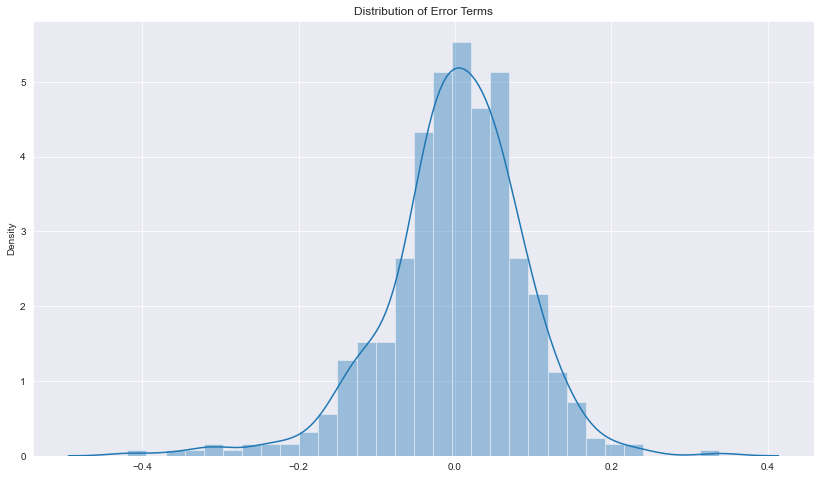

In [256]:
# Ploting of Residuals

plt.figure(figsize = (14,8))
sns.set_style("darkgrid")

sns.distplot(res)

plt.title('Distribution of Error Terms')
plt.show()

<b>We can see Error Terms are normally Distributed with mean Zero. Hence Model is Actaully obeying the assumption of Normality.

#### <font color=blue>Plot the Scatter plot for the  patterns in residual data vs predicted values

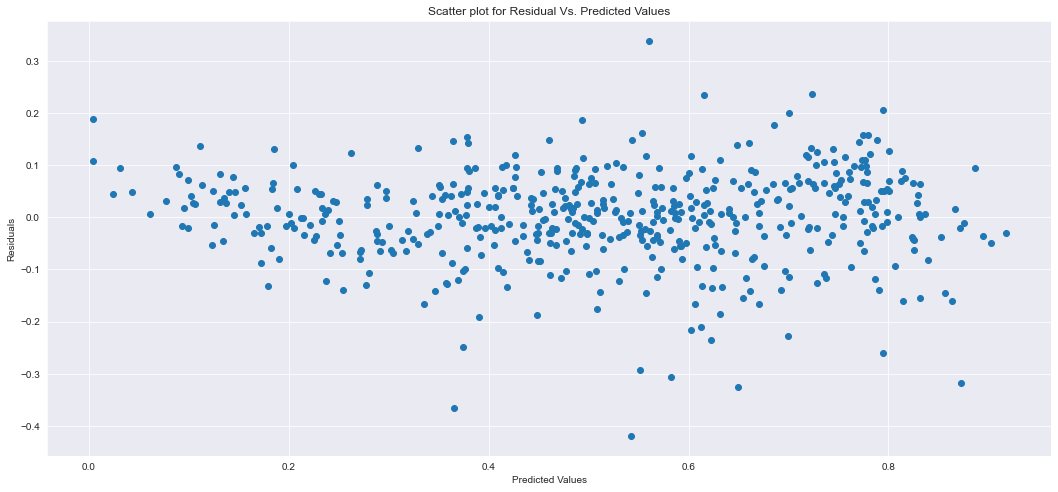

In [257]:
plt.figure(figsize = (18,8))
sns.set_style("darkgrid")
plt.scatter(y_train_pred,res)
plt.title('Scatter plot for Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

<b>As per this above, no specific pattern can be observed; which means, error terms are independent from each other.

### Find out Constant Variance
Plot the scatter plot for predicted points vs actual points

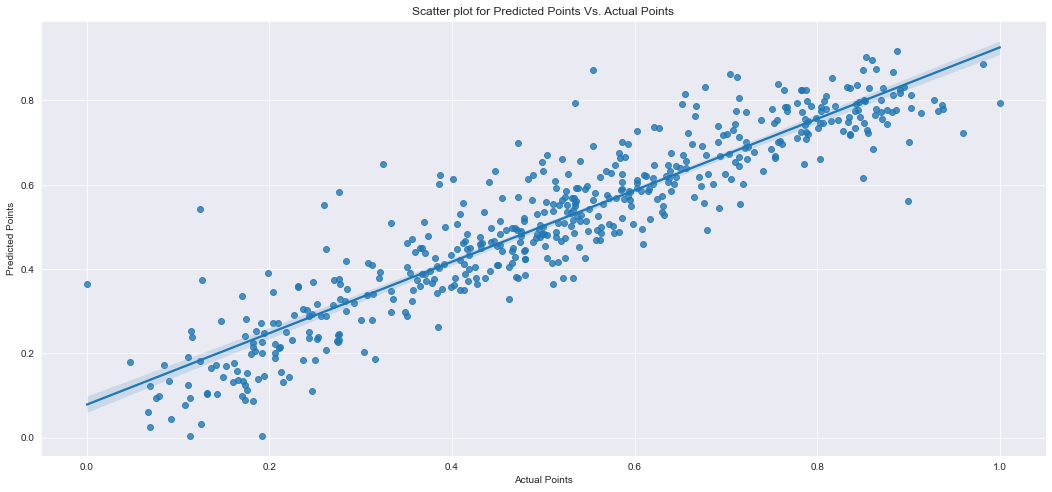

In [258]:
plt.figure(figsize = (18,8))
sns.set_style("darkgrid")
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Scatter plot for Predicted Points Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

<b> As per this above, we can observe Error Terms have approximately a Constant Variance, Hence it follows the <font color = red>Assumption of Homoscedasticity</font>

## Model Evaluation on Test Dataset 

<b>Applying the MinMax scaling on the test sets

In [259]:
num_vars = ['temp', 'windspeed',"hum",'cnt']

day_test[num_vars]=scaler.transform(day_test[num_vars])

y_test = day_test.pop('cnt')
X_test = day_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,summer,fall,winter,...,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,Light
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,1,0,...,0,1,0,0,0,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,1,0,0,...,0,0,0,1,0,0,0,1,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,1,...,0,0,0,0,1,0,0,0,1,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,1,0,...,0,0,0,1,0,0,0,1,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [260]:
# Dropping the Features which were eliminated during the Training Process

X_test_sm = X_test_sm.drop(['fall', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Nov', 'Dec', \
       'Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday','Clear'],axis=1)

# Predict the Price for Test Data using the Trainned Model
y_test_pred = lr_model.predict(X_test_sm)

y_test_pred.sample(5)

653    0.758120
693    0.556743
205    0.538971
522    0.786820
372    0.466714
dtype: float64

<b>
Draw the scatter plot with a regression line. It shows the relationship between the <font color = blue><b><u>Actual Rent of Bikes Count (y_test) and the Predicted Rent of Bikes Count (y_test_pred). </font><p>
<p>
The regression line represents the best-fit linear relationship between the two variables. 
<p>If the points cluster around the line, it indicates a good fit.

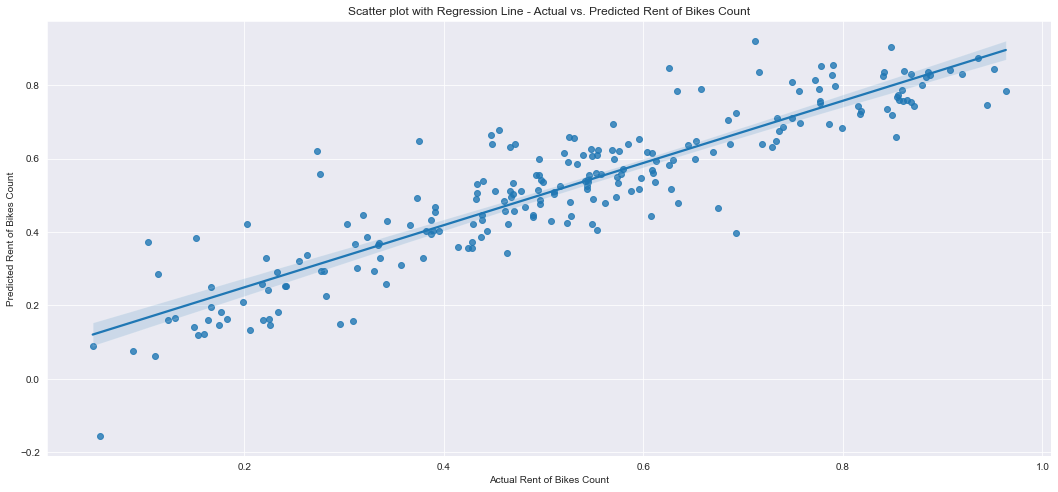

In [261]:
# Plotting y_test (Actual Rent of Bikes Count ) and y_pred ( Predicted Rent of Bikes Count) to understand the spread.

plt.figure(figsize = (18,8))
sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Scatter plot with Regression Line - Actual vs. Predicted Rent of Bikes Count')
plt.xlabel('Actual Rent of Bikes Count')
plt.ylabel('Predicted Rent of Bikes Count')
plt.show()

<b> Check the Model accuracy

In [262]:
# Checking the Accuracy of the Test Model
r2_score(y_test,y_test_pred)

0.8149002944843474

##### <font color=blue> The Final Model accuray is around 81.5%, Which is a Good Score.

<font color=blue>The Model accuracy difference between the Train and Test Data is less than 3% which is acceptable.

In [263]:
Cofficients = round(lr_model.params,2)
beta = Cofficients.sort_values(ascending = False)
beta

temp          0.53
yr            0.23
const         0.19
winter        0.13
Sep           0.13
summer        0.10
Aug           0.06
Saturday      0.05
workingday    0.04
Oct           0.04
holiday      -0.06
Mist         -0.06
hum          -0.17
windspeed    -0.19
Light        -0.25
dtype: float64

In [265]:
# Equation of Best Fit Line :

for i in range(0, len(beta)):
    print(beta[i],'*',beta.index[i],end ='')
    print(' + ',end ='')

0.53 * temp + 0.23 * yr + 0.19 * const + 0.13 * winter + 0.13 * Sep + 0.1 * summer + 0.06 * Aug + 0.05 * Saturday + 0.04 * workingday + 0.04 * Oct + -0.06 * holiday + -0.06 * Mist + -0.17 * hum + -0.19 * windspeed + -0.25 * Light + 

<b>
Equation of Best Fit Line :

cnt = 0.53 * temp + 0.23 * yr + 0.13 * winter + 0.13 * Sep + 0.1 * summer + 0.06 * Aug + 0.05 * Saturday + 0.04 * workingday + 0.04 * Oct - 0.06 * holiday - 0.06 * Mist - 0.17 * hum - 0.19 * windspeed - 0.25 * Light + 0.19

## <font color=Blue> Detailed Data Insights:
<p>
<ol><li><font size=3 color = blue>Temperature is the Most Significant Feature which affects the Business positively,
<li>Whereas the other Environmental condition such as Raining, Humidity, Windspeed and Cloudy affects the Business negatively.
<li>Company need to think how to tackle with bad weather condition and come up with sort of solution which protect users from Raining.
<li>The Demand of Bikes is more in the Winter and Summer season, mostly user don't like to travel using Bikes in Rainy Day or Rainy Season.
<li>It is interesting to see Specially Saturday People like to Rent a Bike more than other usual Days
<li>Demand of Bike Rent has been significantly increased in the 2019 than 2018 so it is clear sign that Boom Bikes is doing a Business.
<li>Even though without expending a single cent BOOM Bikes can expect their business to grow by 19%